In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [ ]:
rice_df = pd.read_csv('/content/drive/MyDrive/KDT/머신러닝과 딥러닝/data/riceClassification.csv')
rice_df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [ ]:
# 데이터 정보 확인
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


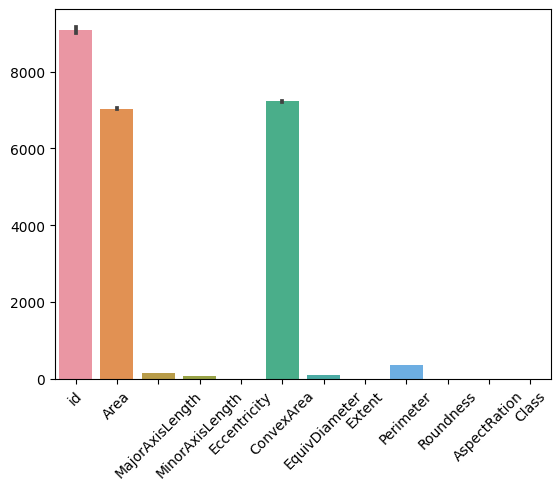

In [ ]:
# 각 데이터양 시각화
sns.barplot(rice_df)
plt.xticks(rotation=45)
plt.show()

# Area, ConvexArea는 데이터 종류가 너무 많기 때문에 처리가 필요

In [ ]:
# 데이터 수치정보
rice_df.describe()

# 이상치는 보이지 않음
# class로 이진분류할 것임

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [ ]:
# Area value_counts확인
rice_df['Area'].value_counts()

6379    15
6396    14
6033    13
6281    13
6370    13
        ..
5599     1
5200     1
4487     1
4727     1
7595     1
Name: Area, Length: 5343, dtype: int64

In [ ]:
# Area 개수가 5343으로 너무 많음
# 범주를 나누는게 좋을듯
# min=2522 max=10210
#
# 0, 3500, 5500, 7500, 9500, 10500

rice_df['AreaCat'] = pd.cut(rice_df['Area'], 5)
rice_df['AreaCat'].value_counts()

# 이처럼 5개의 범주로 나누면 될 것 같다.

(5597.2, 7134.8]      8239
(8672.4, 10210.0]     3642
(7134.8, 8672.4]      3634
(4059.6, 5597.2]      2463
(2514.312, 4059.6]     207
Name: AreaCat, dtype: int64

In [ ]:
# rice_df에 컬럼 추가
rice_df['AreaRank'] = pd.cut(rice_df['Area'], bins=[0, 3500, 5500, 7500, 9500, 10500], labels=[1, 2, 3, 4, 5])
rice_df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class,AreaCat,AreaRank
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1,"(4059.6, 5597.2]",2
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1,"(2514.312, 4059.6]",1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1,"(2514.312, 4059.6]",1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1,"(2514.312, 4059.6]",1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1,"(2514.312, 4059.6]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0,"(5597.2, 7134.8]",3
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0,"(7134.8, 8672.4]",4
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0,"(5597.2, 7134.8]",3
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0,"(5597.2, 7134.8]",3


In [ ]:
# 추가된 컬럼 확인
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               18185 non-null  int64   
 1   Area             18185 non-null  int64   
 2   MajorAxisLength  18185 non-null  float64 
 3   MinorAxisLength  18185 non-null  float64 
 4   Eccentricity     18185 non-null  float64 
 5   ConvexArea       18185 non-null  int64   
 6   EquivDiameter    18185 non-null  float64 
 7   Extent           18185 non-null  float64 
 8   Perimeter        18185 non-null  float64 
 9   Roundness        18185 non-null  float64 
 10  AspectRation     18185 non-null  float64 
 11  Class            18185 non-null  int64   
 12  AreaCat          18185 non-null  category
 13  AreaRank         18185 non-null  category
dtypes: category(2), float64(8), int64(4)
memory usage: 1.7 MB


<Axes: xlabel='AreaRank', ylabel='Class'>

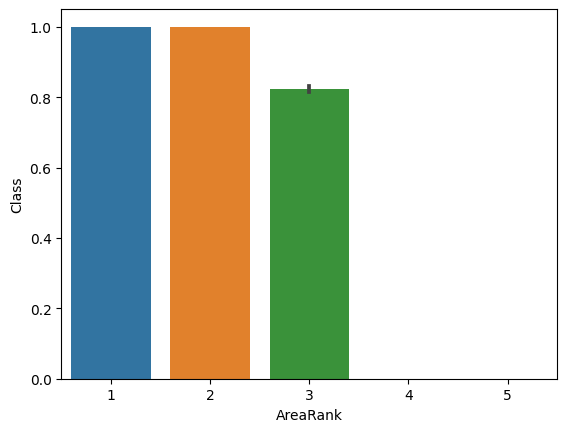

In [ ]:
sns.barplot(x='AreaRank', y='Class', data=rice_df)

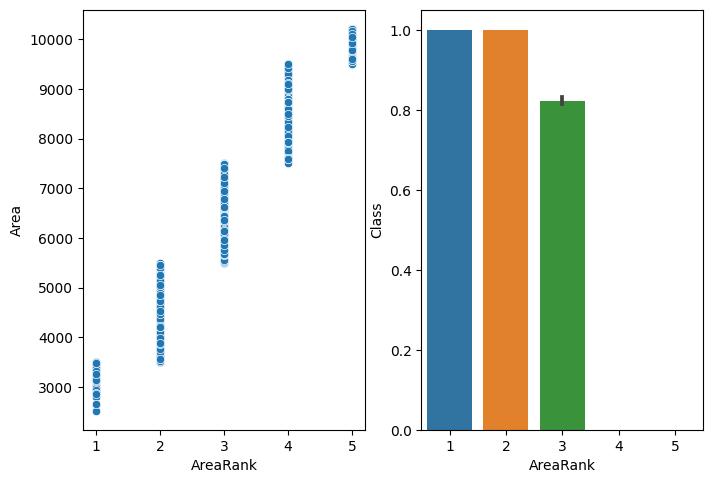

In [ ]:
# groupby에 min()을 찍으면 최소값부터 확인이 가능
rice_df[(rice_df['AreaRank'].astype(int) == 2)].groupby('Area').min()

plt.figure(figsize=(8, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x='AreaRank', y='Area', data=rice_df)

plt.subplot(2, 2, 2)
sns.barplot(x='AreaRank', y='Class', data=rice_df)

plt.show()

# Rank 분류별 데이터 확인
# AreaRank 3부터 class 나뉨

In [ ]:
rice_df['ConvexAreaRank'] = pd.cut(rice_df['ConvexArea'], bins=[2500, 5500, 7500, 8500, 10500, 12500], labels=[1, 2, 3, 4, 5])
rice_df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class,AreaCat,AreaRank,ConvexAreaRank
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1,"(4059.6, 5597.2]",2,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1,"(2514.312, 4059.6]",1,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1,"(2514.312, 4059.6]",1,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1,"(2514.312, 4059.6]",1,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1,"(2514.312, 4059.6]",2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0,"(5597.2, 7134.8]",3,2
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0,"(7134.8, 8672.4]",4,3
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0,"(5597.2, 7134.8]",3,2
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0,"(5597.2, 7134.8]",3,2


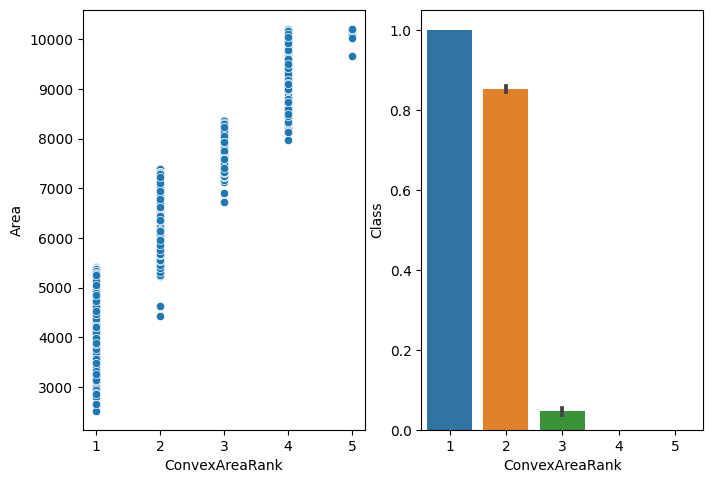

In [ ]:
# groupby에 min()을 찍으면 최소값부터 확인이 가능
rice_df[(rice_df['ConvexAreaRank'].astype(int) == 2)].groupby('Area').min()

plt.figure(figsize=(8, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x='ConvexAreaRank', y='Area', data=rice_df)

plt.subplot(2, 2, 2)
sns.barplot(x='ConvexAreaRank', y='Class', data=rice_df)

plt.show()

# Rank 분류별 데이터 확인
# ConvexAreaRank 2부터 class 나뉨

In [ ]:
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               18185 non-null  int64   
 1   Area             18185 non-null  int64   
 2   MajorAxisLength  18185 non-null  float64 
 3   MinorAxisLength  18185 non-null  float64 
 4   Eccentricity     18185 non-null  float64 
 5   ConvexArea       18185 non-null  int64   
 6   EquivDiameter    18185 non-null  float64 
 7   Extent           18185 non-null  float64 
 8   Perimeter        18185 non-null  float64 
 9   Roundness        18185 non-null  float64 
 10  AspectRation     18185 non-null  float64 
 11  Class            18185 non-null  int64   
 12  AreaCat          18185 non-null  category
 13  AreaRank         18185 non-null  category
 14  ConvexAreaRank   18185 non-null  category
dtypes: category(3), float64(8), int64(4)
memory usage: 1.7 MB


In [ ]:
# 타입 변경

rice_df['AreaRank'] = rice_df['AreaRank'].astype(int)
rice_df['ConvexAreaRank'] = rice_df['ConvexAreaRank'].astype(int)

rice_df.describe()
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               18185 non-null  int64   
 1   Area             18185 non-null  int64   
 2   MajorAxisLength  18185 non-null  float64 
 3   MinorAxisLength  18185 non-null  float64 
 4   Eccentricity     18185 non-null  float64 
 5   ConvexArea       18185 non-null  int64   
 6   EquivDiameter    18185 non-null  float64 
 7   Extent           18185 non-null  float64 
 8   Perimeter        18185 non-null  float64 
 9   Roundness        18185 non-null  float64 
 10  AspectRation     18185 non-null  float64 
 11  Class            18185 non-null  int64   
 12  AreaCat          18185 non-null  category
 13  AreaRank         18185 non-null  int64   
 14  ConvexAreaRank   18185 non-null  int64   
dtypes: category(1), float64(8), int64(6)
memory usage: 2.0 MB


In [ ]:
# 필요없는 컬럼 제거
rice_df.drop(['id', 'Area', 'ConvexArea', 'AreaCat'], axis=1, inplace=True)
rice_df.head()


,MajorAxisLength,MinorAxisLength,Eccentricity,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class,AreaRank,ConvexAreaRank
0,92.229316,64.012769,0.719916,76.004525,0.657536,273.085,0.764510,1.440796,1,2,1
1,74.691881,51.400454,0.725553,60.471018,0.713009,208.317,0.831658,1.453137,1,1,1
2,76.293164,52.043491,0.731211,62.296341,0.759153,210.012,0.868434,1.465950,1,1,1
3,77.033628,51.928487,0.738639,62.551300,0.783529,210.657,0.870203,1.483456,1,1,1
4,85.124785,56.374021,0.749282,68.571668,0.769375,230.332,0.874743,1.510000,1,2,1


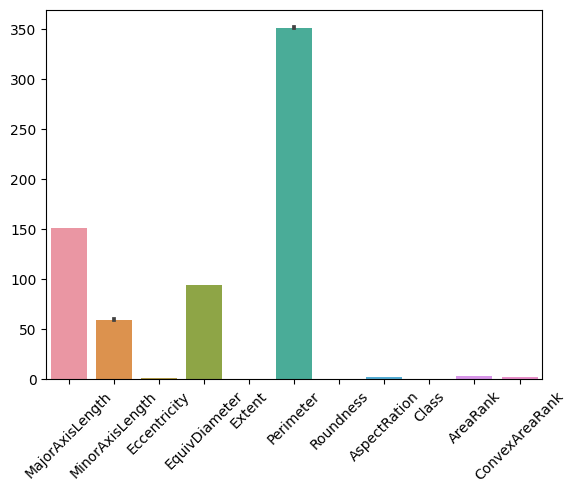

In [ ]:
# 데이터양 다시 확인
sns.barplot(rice_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# perimeter는 둘레에 대한 실수값
rice_df['Perimeter'].value_counts()
rice_df['Perimeter'].max()

# Area와 마찬가지로 범주를 나눠야할듯
# min: 197.015
# max: 508.511
# 0 ~ 200
# 201 ~ 300
# 301 ~ 400
# 401 ~ 500
# 501 ~ 600

rice_df['PerimeterRank'] = pd.cut(rice_df['Perimeter'], bins=[0, 200, 300, 400, 500, 600], labels=[1, 2, 3, 4, 5])
rice_df.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class,AreaRank,ConvexAreaRank,PerimeterRank
0,92.229316,64.012769,0.719916,76.004525,0.657536,273.085,0.764510,1.440796,1,2,1,2
1,74.691881,51.400454,0.725553,60.471018,0.713009,208.317,0.831658,1.453137,1,1,1,2
2,76.293164,52.043491,0.731211,62.296341,0.759153,210.012,0.868434,1.465950,1,1,1,2
3,77.033628,51.928487,0.738639,62.551300,0.783529,210.657,0.870203,1.483456,1,1,1,2
4,85.124785,56.374021,0.749282,68.571668,0.769375,230.332,0.874743,1.510000,1,2,1,2


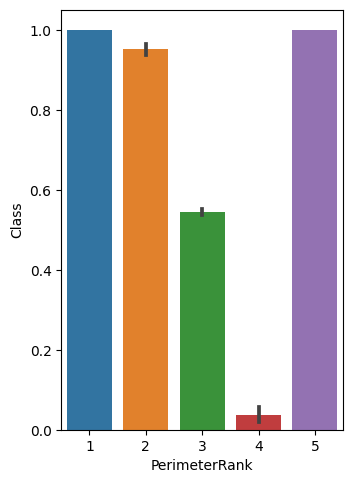

In [ ]:
# groupby에 min()을 찍으면 최소값부터 확인이 가능
rice_df[(rice_df['PerimeterRank'].astype(int) == 2)].groupby('Perimeter').min()

plt.figure(figsize=(8, 12))

plt.subplot(2, 2, 1)
sns.barplot(x='PerimeterRank', y='Class', data=rice_df)

plt.show()

# 3, 4의 범위에 class=0이 많은듯함
# 확인이 필요

In [ ]:
rice_df['PerimeterRank'].value_counts()
# 데이터가 2, 3, 4에만 몰려있음, 다시 분류 필요

3    16915
2      821
4      447
1        1
5        1
Name: PerimeterRank, dtype: int64

<Axes: >

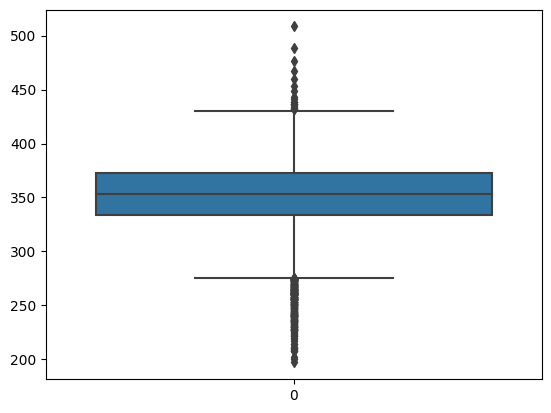

In [ ]:
sns.boxplot(rice_df['Perimeter'])

In [ ]:
rice_df['PerimeterRank'] = pd.cut(rice_df['Perimeter'], bins=[0, 330, 350, 380, 520], labels=[1, 2, 3, 4])
rice_df['PerimeterRank'].value_counts()


3    6780
2    4499
1    3779
4    3127
Name: PerimeterRank, dtype: int64

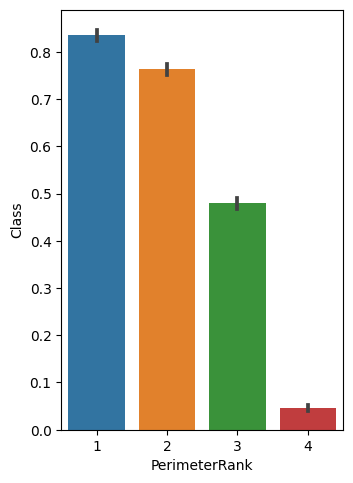

In [ ]:
# groupby에 min()을 찍으면 최소값부터 확인이 가능
rice_df[(rice_df['PerimeterRank'].astype(int) == 2)].groupby('Perimeter').min()

plt.figure(figsize=(8, 12))

plt.subplot(2, 2, 1)
sns.barplot(x='PerimeterRank', y='Class', data=rice_df)

plt.show()

# 3, 4의 범위에 class=0이 많은듯함
# 확인이 필요

<ipython-input-24-af77876a5141>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rice_df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)


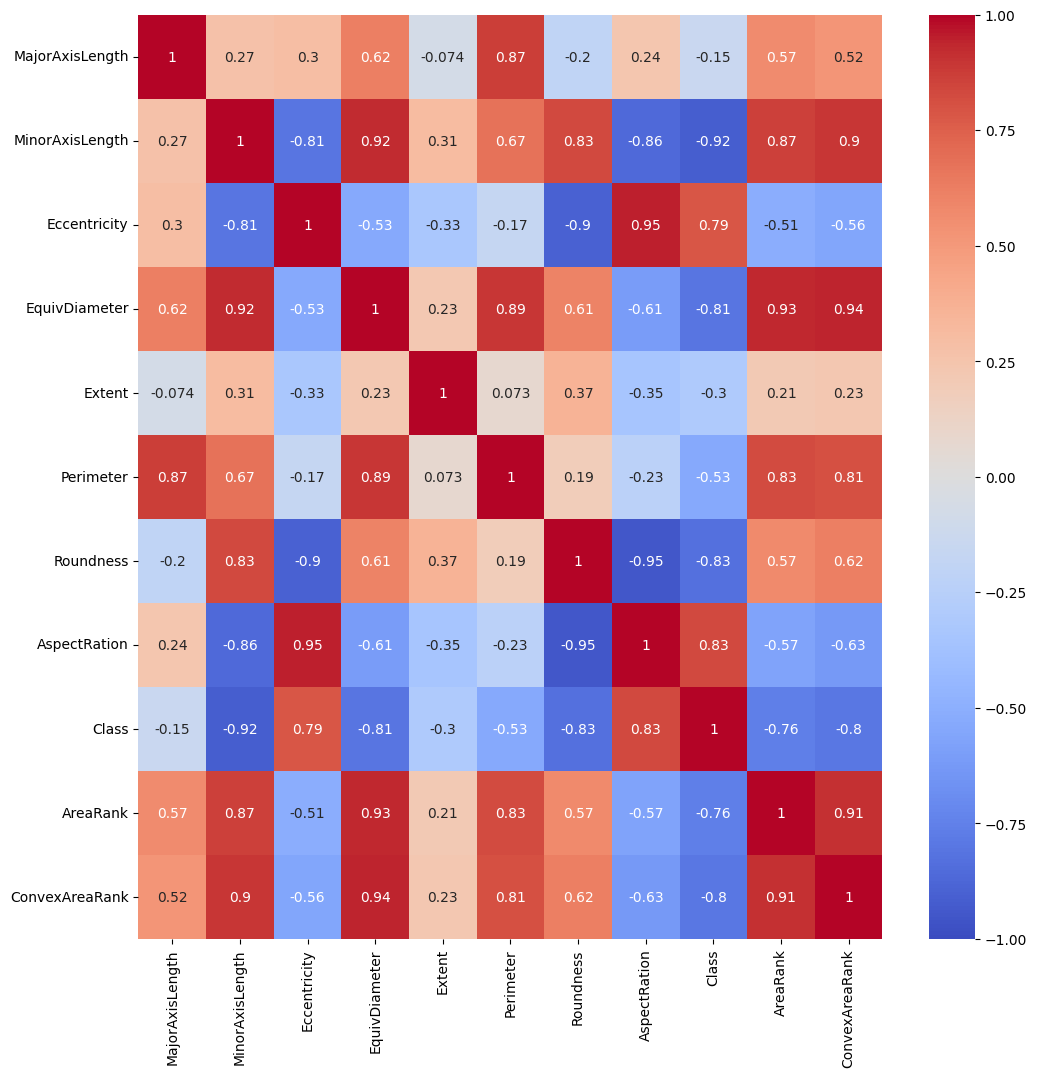

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(rice_df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

# 지울 데이터가 더이상 보이지 않음.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(rice_df.drop('Class', axis=1), rice_df['Class'], test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(14548, 11) (14548,)
(3637, 11) (3637,)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
DTC = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)
DTC.fit(X_train, y_train)
pred1 = DTC.predict(X_test)
accuracy_score(y_test, pred1)


0.9859774539455596

In [ ]:
ABC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, min_samples_leaf=10),
                         n_estimators=5,
                         learning_rate=0.5,
                         random_state=42)
ABC.fit(X_train, y_train)
pred2 = ABC.predict(X_test)

accuracy_score(y_test, pred2)

# 높은 정확도를 가짐.



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9890019246631839

In [ ]:
proba1 = DTC.predict_proba(X_test)
DTC_auc = roc_auc_score(y_test, proba1[:, 1])

proba2 = ABC.predict_proba(X_test)
ABC_auc = roc_auc_score(y_test, proba2[:, 1])

print('DTC_auc: ', DTC_auc)
print('ABC_auc: ', ABC_auc)

# 높은 성능을 보임


DTC_auc:  0.9907877365410005
ABC_auc:  0.9987726761527553


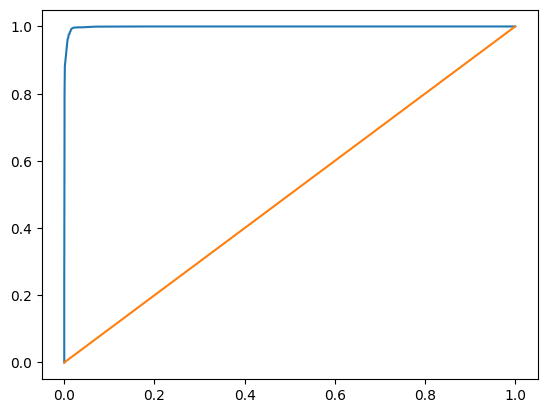

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics._plot.roc_curve import roc_curve

# fpr = False Positive Rate
# tpr = True Positive Rate
# thr = Threshold
fpr, tpr, thr = roc_curve(y_test, proba2[:, 1])

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1])
plt.show()

In [ ]:
# 비교적 상관계수가 낮은 데이터들만 있다고 가정
# MajorAxisLength Extent Perimeter
new_rice_df = rice_df.drop(['MinorAxisLength', 'Eccentricity', 'EquivDiameter', 'Roundness', 'AspectRation', 'AreaRank', 'ConvexAreaRank', 'PerimeterRank'], axis=1).copy()

<Axes: >

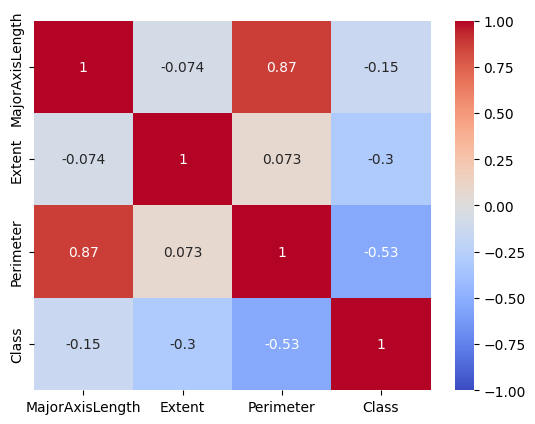

In [ ]:
sns.heatmap(new_rice_df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_rice_df.drop('Class', axis=1), new_rice_df['Class'], test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14548, 3) (14548,)
(3637, 3) (3637,)


In [ ]:
new_DTC = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)
new_DTC.fit(X_train, y_train)
new_pred1 = new_DTC.predict(X_test)
accuracy_score(y_test, new_pred1)

0.8053340665383558

# AdaBoost

1. 약한 분류기로 예측

2. 오답에 대해 가중치를 업데이트

3. 업데이트된 가중치를 정규화 -> 오답은 가중치가 증가하고 정답은 가중치가 낮아짐.

4. 다시 학습을 위한 데이터를 복원추출함 -> 가중치가 높아진 오분류 데이터가 더 많이 포함된 상태로 학습

5. 이전 모형에서 잘못 분류한 것들을 더 잘 분류하는 방향으로 학습

In [ ]:
new_ABC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, min_samples_leaf=10),
                         n_estimators=5,
                         learning_rate=0.5,
                         random_state=42)
new_ABC.fit(X_train, y_train)
new_pred2 = new_ABC.predict(X_test)

accuracy_score(y_test, new_pred2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9084410228210064

In [ ]:
0.8053340665383558 - 0.9084410228210064

-0.10310695628265054

In [ ]:
new_proba1 = new_DTC.predict_proba(X_test)
new_DTC_auc = roc_auc_score(y_test, new_proba1[:, 1])

new_proba2 = new_ABC.predict_proba(X_test)
new_ABC_auc = roc_auc_score(y_test, new_proba2[:, 1])

print('new_DTC_auc: ', new_DTC_auc)
print('new_ABC_auc: ', new_ABC_auc)

# 차이를 확실히 보기 위해 관련 데이터를 줄였다.
# 차이가 확실히 보인다.


new_DTC_auc:  0.8791740012713314
new_ABC_auc:  0.9751337037308689


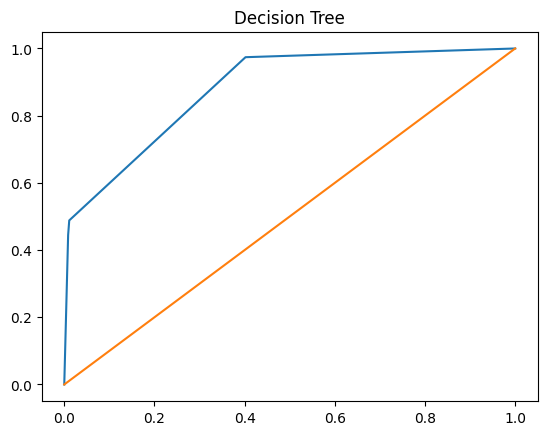

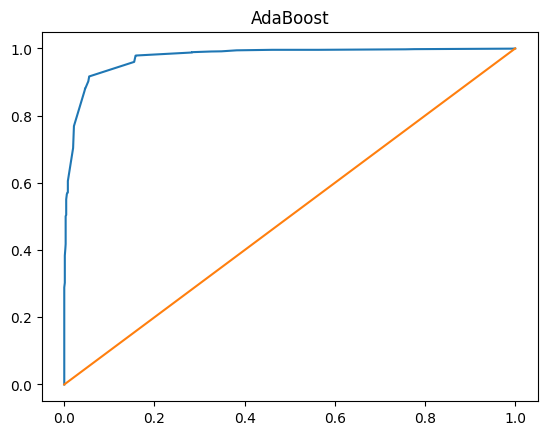

In [ ]:
def roc_auc(name, proba):
    fpr, tpr, thr = roc_curve(y_test, proba[:, 1])

    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1])
    plt.title(name)
    plt.show()
roc_auc('Decision Tree', new_proba1)
roc_auc('AdaBoost', new_proba2)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10,
                       random_state=1608637542)


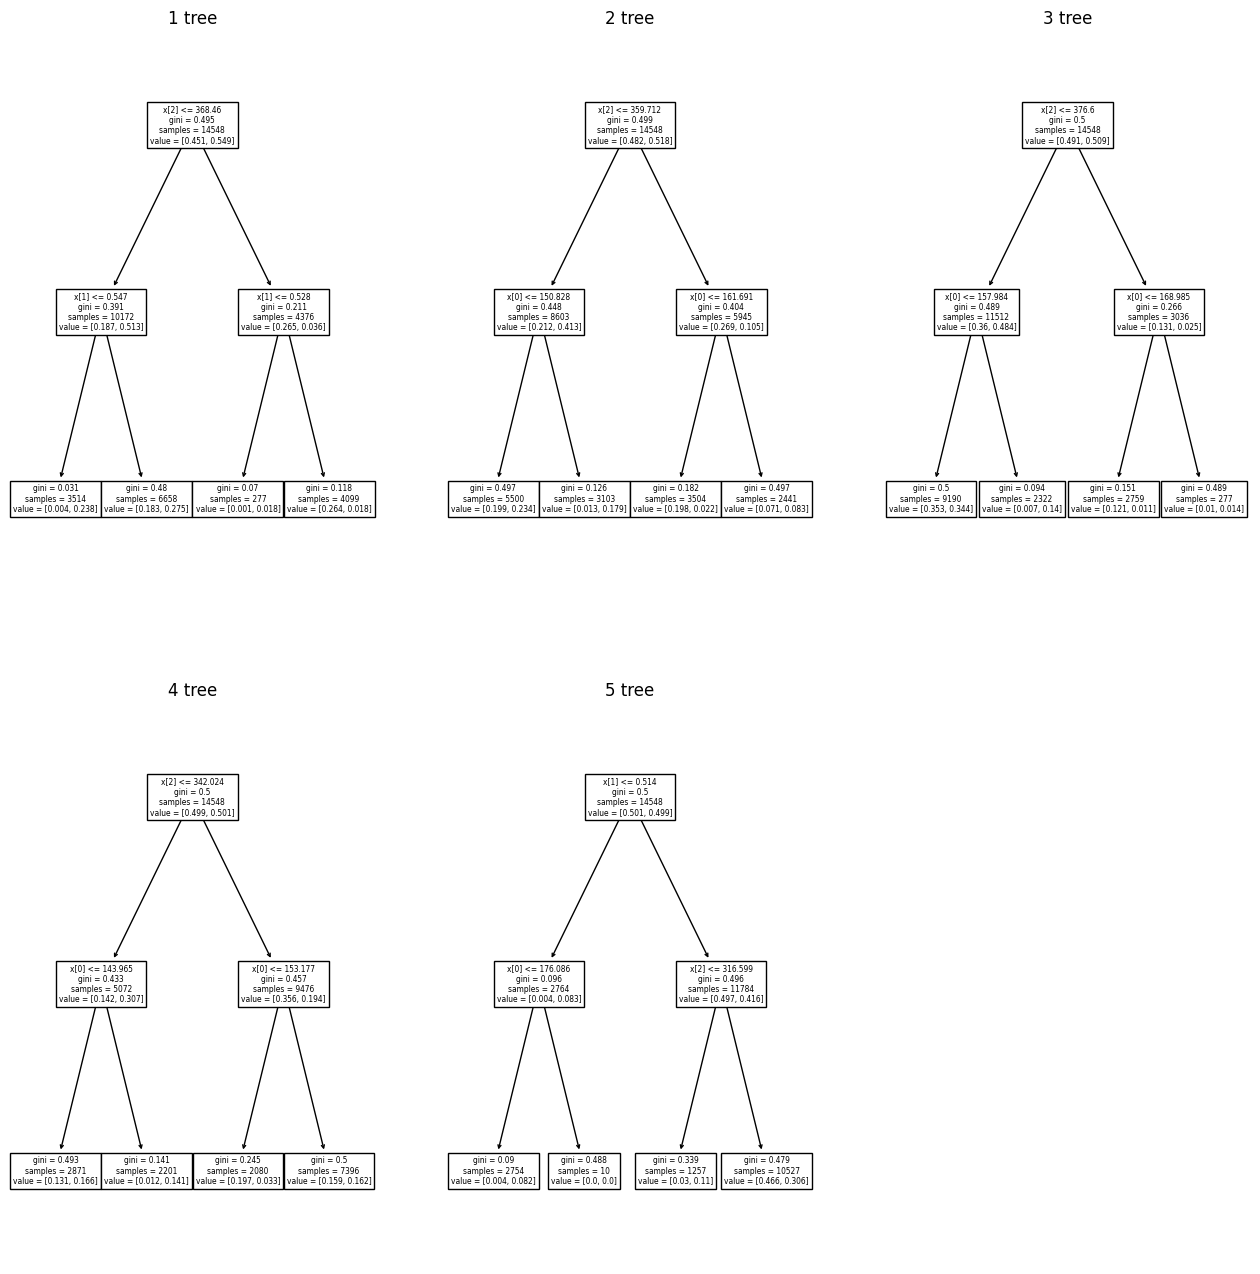

In [ ]:
from sklearn.tree import plot_tree

n_estimator = len(new_ABC.estimators_)
print(new_ABC.estimators_[0])
fig = plt.figure(figsize=(16, 16), facecolor='white')
row_num=2
col_num=3
for i in range(n_estimator):
    ax = fig.add_subplot(row_num, col_num, i+1)
    plot_tree(new_ABC.estimators_[i],
        ax=ax
        )
    ax.set_title(f'{i+1} tree')

plt.show()

# Gradient Boost

1. 초기 예측을 설정 -> 회귀의 경우 평균, 분류의 경우 확률

2. 실제 값과의 차이를 계산 -> 잔차

3. 모델이 잔차를 학습 -> 잔차를 예측

4. 기존 잔차와 예측한 잔차를 더해서 새로운 예측값 도출

5. 새로운 예측값과 실제값의 차이를 계산 -> 잔차

6. 3 ~ 5를 반복

7. 잔차가 충분히 감소하거나, 미리 정의된 횟수에 도달하면 학습 종료

In [ ]:
GBC = GradientBoostingClassifier(random_state=42)
GBC.fit(X_train, y_train)
pred = GBC.predict(X_test)
roc_auc_score(y_test, pred)

0.9688424465796294

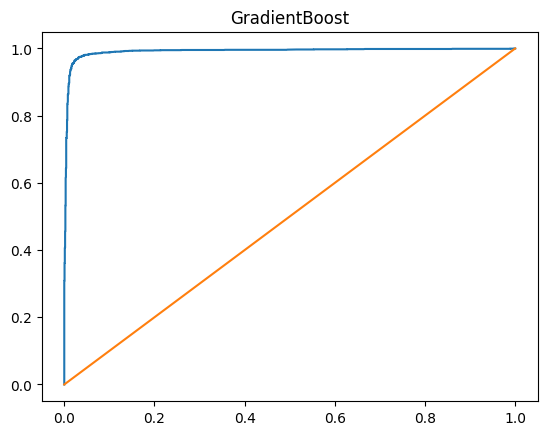

In [ ]:
roc_auc('GradientBoost', GBC.predict_proba(X_test))

# XGBoost

* 기존 GBM방식의 과적합을 방지하기 위한 알고리즘

* Decision Tree를 기본 학습기로 함

* GBM에는 없는 규제를 제공함

* 자동 가지치기 기능이 있음

* 향상된 병렬처리 기능 제공

* 알고리즘 최적화로 속도가 더 빠름

* 자동 결측값 처리와 자동 피처 스케일 조정 기능이 있음



### XGBoost의 과적합 방지를 위한 알고리즘

- 규제(Regularization)

    * L1(Lasso)규제: 가중치를 다르게 주어 불필요한 특성을 제거하여 과적합을 방지(단순화)

    * L2(Ridge)규제: 가중치의 크기를 일반화하여 이상치에 민감하지 않도록 함(가중치 감쇠)



- 정규화 및 복잡성 제어

    * max_depth, min_child_weight, gamma, sampling 파라미터를 조절하여 모델 성능 개선 가능



- 샘플링(Sampling)

    * subsample(colsample_bytree): 훈련 데이터에 사용되는 샘플의 비율을 설정

    * colsample_bylevel: 각 트리 레벨에서 서로 다른 특성의 부분집합을 사용하여 트리의 다양성 증가

    * colsample_bynode: 특정 노드에서 서로 다른 특성의 부분집합을 사용하여 트리의 다양성 증가



- 조기 종료(Early Stopping)


In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
XGC = XGBClassifier(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=42)
XGC.fit(X_train, y_train)
pred = XGC.predict(X_test)
roc_auc_score(y_test, pred)

0.9703885201212654

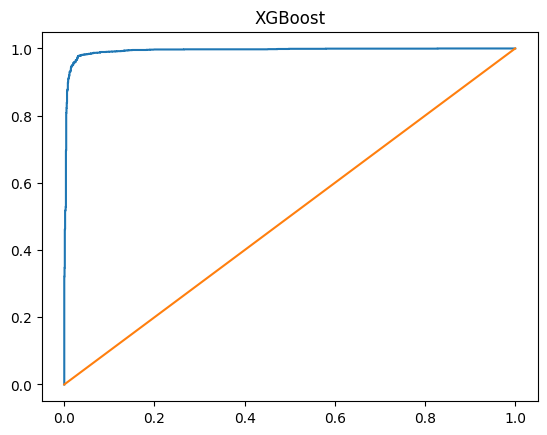

In [ ]:
roc_auc('XGBoost', XGC.predict_proba(X_test))

# LightGBM

* 리프 중심 트리 분할 (Leaf-wise Tree Splitting): LightGBM은 트리를 분할할 때 전통적인 깊이 우선 방식이 아닌, 리프 중심 방식을 사용합니다. 이는 한 번에 가장 정보 획득이 큰 리프 노드를 선택하여 빠르게 학습할 수 있도록 도와줍니다.

* 카테고리형 피처의 지원: LightGBM은 카테고리형 데이터를 직접 지원하여, 더 효과적으로 카테고리 피처를 활용할 수 있습니다.

* 병렬 학습과 분산 학습: LightGBM은 다중 CPU 및 GPU를 활용하여 병렬 학습을 지원하며, 분산 학습도 가능합니다.

* 히스토그램 기반의 학습 (Histogram-based Learning): 데이터를 일정한 간격의 구간으로 나누어 히스토그램을 만들고, 이를 이용하여 빠르게 분할을 결정합니다. 이는 메모리 사용을 줄이면서 계산 효율을 높여줍니다.

* 조기 종료 (Early Stopping): 검증 데이터에 대한 성능이 개선되지 않으면 일정 횟수 이후 학습을 중단하는 기능을 제공하여 과적합을 방지합니다.

* 규제 기능: 과적합을 줄이기 위해 L1 및 L2 정규화와 같은 규제 기능을 지원합니다.

* 스케일링 불필요: 특정 피처의 스케일링을 할 필요가 없습니다.


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
LGC = LGBMClassifier(random_state=42)
LGC.fit(X_train, y_train)
pred = LGC.predict(X_test)
roc_auc_score(y_test, pred)

[LightGBM] [Info] Number of positive: 7980, number of negative: 6568
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 14548, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.548529 -> initscore=0.194729
[LightGBM] [Info] Start training from score 0.194729


0.970124932766124

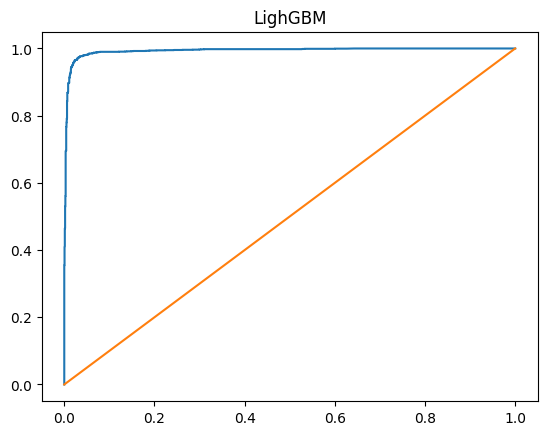

In [ ]:
roc_auc('LighGBM', LGC.predict_proba(X_test))